In [39]:
from HyperparamCalculator import HyperparamCalculation, predictByModel
import pandas as pd
import numpy as np

titanic_data = pd.read_csv("data/titanic_prepared.csv").drop(['Unnamed: 0'], axis=1)

titanic_full_df = titanic_data.sample(frac=1, random_state=5)
testPart = int(len(titanic_full_df)*0.1)
test_df = titanic_full_df[:testPart]
train_df = titanic_full_df[testPart:]

def divideData(df):
    return (df.drop(['label'], axis=1), df.label)

test_x, test_y = divideData(test_df)
train_x, train_y = divideData(train_df)

## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

paramsDecTree = {
    "max_depth": list(range(1, 15)),
    "criterion": ("gini", "entropy", "log_loss")
}

decTreeParametrizer = lambda p: DecisionTreeClassifier(max_depth=p[0], criterion=p[1])
decTreeCalculator = HyperparamCalculation(trainData=(train_x, train_y), validData=(test_x, test_y), setParamFunc=decTreeParametrizer, iterationsCnt=50)
DecTreeParams = decTreeCalculator.calculate(paramsDecTree, testIterationsCnt=30)

modelDecTree = decTreeParametrizer(DecTreeParams)
modelDecTree.fit(train_x, train_y)
result = predictByModel(modelDecTree, test_x, test_y, modelName="DecisionTree", dataType='Test')

Лучшая точность (Validation): 90.65%
Лучшие параметры (Validation): (6, 'entropy')
Точность определения (Test): 90.65% (DecisionTree)


### С помощью Decision Tree выбрать 2 самых важных признака и проверить точность модели, обученной только на них.

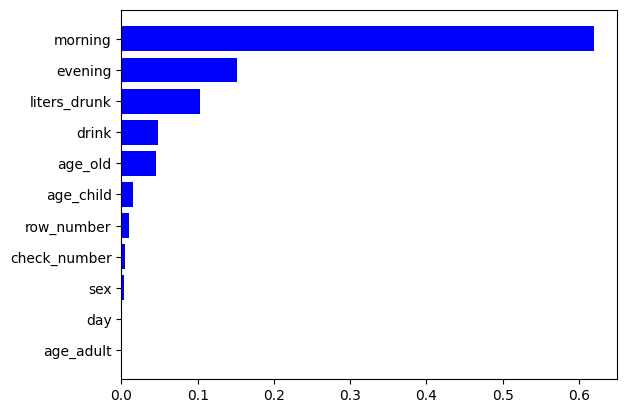

In [40]:
import matplotlib.pyplot as plt

importanceRandomForest = modelDecTree.feature_importances_
features = test_x.columns
indices = np.argsort(importanceRandomForest)
plt.barh(range(len(indices)), importanceRandomForest[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

In [48]:
mostImportantTags = list(features[indices][::-1][:2]) + ['label']

modelDecTree_IT = decTreeParametrizer(DecTreeParams)
test_x_IT, test_y_IT = divideData(test_df[mostImportantTags])
train_x_IT, train_y_IT = divideData(train_df[mostImportantTags])
modelDecTree_IT.fit(train_x_IT, train_y_IT)

print(f"Предсказание по тегам: {mostImportantTags[:2]}")
result = predictByModel(modelDecTree_IT, test_x_IT, test_y_IT, modelName="DecisionTree", dataType='Test')

Предсказание по тегам: ['morning', 'evening']
Точность определения (Test): 89.29% (DecisionTree)


## XGBClassifier

In [ ]:
from xgboost import XGBClassifier

paramsXGBoost = {
    "n_estimators": list(range(1, 30)),
    "max_depth": list(range(1, 10))
}

XGBoostParametrize = lambda p: XGBClassifier(n_estimators=p[0], max_depth=p[1])
XGBoostCalculator = HyperparamCalculation(trainData=(train_x, train_y), validData=(test_x, test_y), setParamFunc=XGBoostParametrize, iterationsCnt=30)
XGBoostParams = XGBoostCalculator.calculate(paramsXGBoost, testIterationsCnt=15)

modelXGBoost = XGBoostParametrize(XGBoostParams)
modelXGBoost.fit(train_x, train_y)

result = predictByModel(modelXGBoost, test_x, test_y, modelName="XGBoost", dataType='Test')

Лучшая точность (Validation): 90.8%
Лучшие параметры (Validation): (27, 2)
Точность определения (Test): 90.8% (XGBoost)


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model._sag import ConvergenceWarning

paramsLogReg = {
    "C": [x/100 for x in range(10, 101, 10)],
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'],
    "max_iter": [500]
}

LogRegParametrize = lambda p: LogisticRegression(C=p[0], solver=p[1], max_iter=p[2])
LogRegCalculator = HyperparamCalculation(trainData=(train_x, train_y), validData=(test_x, test_y), setParamFunc=LogRegParametrize, iterationsCnt=5)
LogRegParams = LogRegCalculator.calculate(paramsLogReg, testIterationsCnt=1)


modelLogReg = LogRegParametrize(LogRegParams)
modelLogReg.fit(train_x, train_y)

result = predictByModel(modelXGBoost, test_x, test_y, modelName="LogisticRegression", dataType="Test")

Лучшая точность (Validation): 88.99%
Лучшие параметры (Validation): (0.3, 'liblinear', 500)
Точность определения (Test): 90.8% (LogisticRegression)
